# Module 2 - Assignment - Uber Supply Demand
Student - Jagadish Janakiraman

## Question 1 - Visually identify the most pressing problems for Uber. 
Hint: Create plots to visualize the frequency of requests that get canceled or show 'no cars available'; 
    identify the most problematic types of requests (city to airport/airport to city etc.) and 
    the time slots (early mornings, late evenings etc.) using plots

In [54]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [55]:
# loading the data into a pandas dataframe
uber_df = pd.read_csv("Uber Request Data.csv")
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [56]:
# view record samples
uber_df.sample(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
5056,2578,Airport,NaN,No Cars Available,12/7/2016 21:42,NaN
1346,282,City,141.0,Trip Completed,11/7/2016 6:56,11/7/2016 8:11
993,3723,Airport,103.0,Trip Completed,13-07-2016 20:03:45,13-07-2016 20:57:08
2403,1210,Airport,252.0,Trip Completed,11/7/2016 21:24,11/7/2016 22:33
4444,1061,Airport,NaN,No Cars Available,11/7/2016 19:44,NaN


In [57]:
# replacing the '/' with a '-' in the request timestamp column
# convert from object to timestamp

uber_df["Request timestamp"] =  uber_df['Request timestamp'].str.replace('/', '-')
uber_df["Request timestamp"] = pd.to_datetime(uber_df["Request timestamp"])

In [58]:
# verify object is converted to timestamp for request timestamp
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [59]:
# get count of null columns
uber_df.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [60]:
#Drop driver id and drop timestamp and temp variables as they are not required for analysis

# 2650 null values in driver id and 3914 null values in drop timestamp (total 6745 rows )

uber_df = uber_df.drop(['Request id', 'Driver id', 'Drop timestamp'], axis = 1)
uber_df.sample(10)

,Pickup point,Status,Request timestamp
6181,City,No Cars Available,2016-07-15 01:37:01
5699,City,No Cars Available,2016-07-14 06:51:18
1089,City,Trip Completed,2016-12-07 05:16:00
2812,Airport,Trip Completed,2016-07-13 23:57:31
6705,Airport,No Cars Available,2016-07-15 22:21:14
5852,Airport,No Cars Available,2016-07-14 17:43:44
3050,City,Cancelled,2016-07-14 08:03:39
976,City,Trip Completed,2016-12-07 19:15:00
5698,Airport,No Cars Available,2016-07-14 06:50:07
799,City,Trip Completed,2016-07-15 07:42:06


In [61]:
# view the available columns
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Pickup point       6745 non-null   object        
 1   Status             6745 non-null   object        
 2   Request timestamp  6745 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 158.2+ KB


In [62]:
#Get Unique hours
uber_df['Request timestamp'].dt.hour.unique()

array([11, 17,  9, 21,  8,  6,  5, 12,  4, 14, 22, 10, 18, 15,  2, 13, 16,
       19,  7, 20,  0,  3, 23,  1], dtype=int64)

In [63]:
# Group the trip into 6 sessions from the hour of the day (from Request timestamp column)

uber_df['Session'] = pd.cut(uber_df['Request timestamp'].dt.hour,[0,4,8,12,16,20,24],labels=['Late_Night','Early_Morning','Late_Morning','Afternoon','Evening','Night'])
uber_df.head()

,Pickup point,Status,Request timestamp,Session
0,Airport,Trip Completed,2016-11-07 11:51:00,Late_Morning
1,Airport,Trip Completed,2016-11-07 17:57:00,Evening
2,City,Trip Completed,2016-12-07 09:17:00,Late_Morning
3,Airport,Trip Completed,2016-12-07 21:08:00,Night
4,City,Trip Completed,2016-07-13 08:33:16,Early_Morning


#### Session Details

Late_Night    : 12 AM - 4 AM

Early_Morning : 4 AM - 8AM

Late_Morning  : 8 AM - 12 PM

Afternoon     : 12 PM - 4 PM

Evening       : 4 PM - 8 PM

Night         : 8 PM - 12 AM


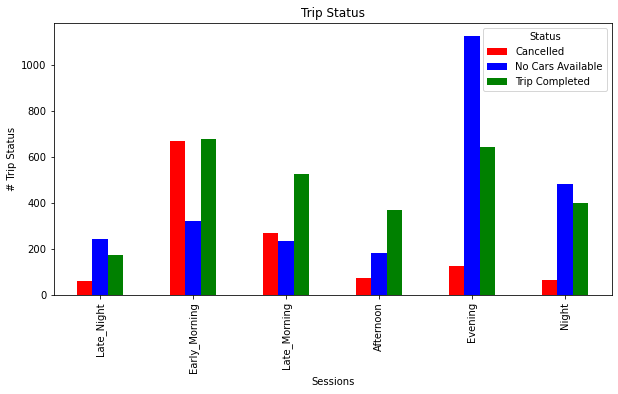

In [74]:
# plotting by Session and Status to get count of status by session

uber_df.groupby(['Session','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(10,5), color=["r", "b","g"])

plt.title('Trip Status')
plt.xlabel('Sessions')
plt.ylabel('# Trip Status')

plt.show()

## Answer 1.1

#### 1. More Trips are cancelled in Early Morning between 4-8 AM & Late Morning between 8AM-12PM

####  2. No cars available between Evening 4-8 PM and Night 8PM-12AM

In [65]:
# filtering out only "Cancelled"  trips

cancel_df=uber_df[uber_df["Status"]=='Cancelled']
cancel_df=cancel_df.reset_index(drop=True)
cancel_df.head()

,Pickup point,Status,Request timestamp,Session
0,City,Cancelled,2016-07-13 06:08:41,Early_Morning
1,City,Cancelled,2016-07-14 17:07:58,Evening
2,Airport,Cancelled,2016-07-14 20:51:37,Evening
3,City,Cancelled,2016-07-15 10:12:40,Late_Morning
4,Airport,Cancelled,2016-12-07 19:14:00,Evening


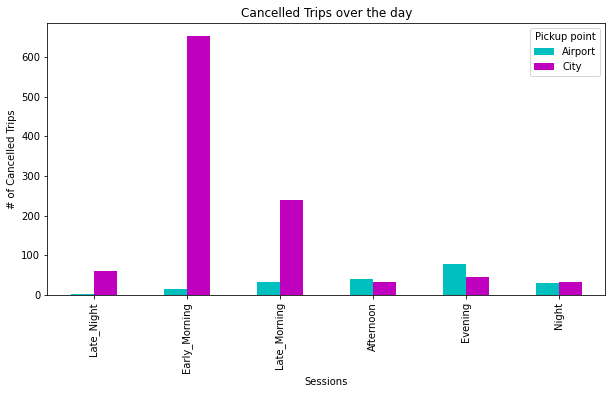

In [73]:
# plotting by Session and cancelled status 

cancel_df.groupby(['Session','Pickup point']).Session.count().unstack().plot.bar(legend=True, figsize=(10,5), color=["c", "m"])

plt.title('Cancelled Trips over the day')
plt.xlabel('Sessions')
plt.ylabel('# of Cancelled Trips')

plt.show()

## Answer 1.2

#### More cancellations are occurring in Early Morning and Late morning hours from city to Airport

#### Maximum cancellations are from City To Airport between 4 AM - 8 AM 

In [67]:
# filtering out only "No Cars Available"  trips

nocar_df=uber_df[uber_df["Status"]== 'No Cars Available']
nocar_df=nocar_df.reset_index(drop=True)
nocar_df.sample(5)

,Pickup point,Status,Request timestamp,Session
2270,City,No Cars Available,2016-07-15 13:41:06,Afternoon
1550,City,No Cars Available,2016-07-14 04:00:13,Late_Night
530,Airport,No Cars Available,2016-12-07 03:13:00,Late_Night
1869,Airport,No Cars Available,2016-07-14 19:26:41,Evening
985,Airport,No Cars Available,2016-12-07 22:11:00,Night


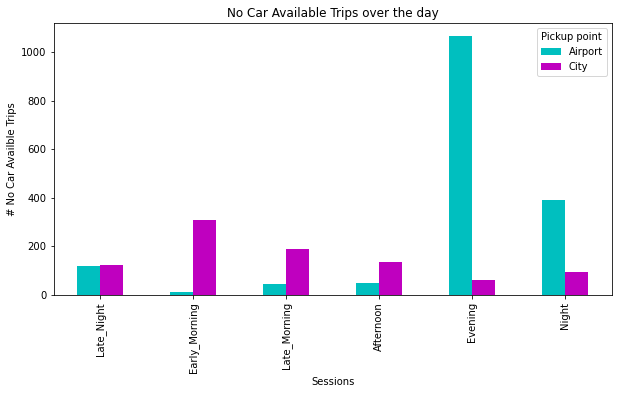

In [72]:
# plotting by Session and 'No Cars available' status 

nocar_df.groupby(['Session','Pickup point']).Session.count().unstack().plot.bar(legend=True, figsize=(10,5), color=["c", "m"])

plt.title('No Car Available Trips over the day')
plt.xlabel('Sessions')
plt.ylabel('# No Car Availble Trips')

plt.show()

## Answer 1.3

#### Maximum number of No car available trips is in the evening (4 PM to 8 PM) from Airport to City

## Question 2  Find out the gap between supply and demand 

Find the time slots when the highest gap exists

Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

In [69]:
# create a new column (supply_demand), mark a row as 'Supply' if Trip is completed else mark it as 'Demand'

uber_df['supply_demand'] = ['Supply' if x == 'Trip Completed' else 'Demand' for x in uber_df['Status']]
uber_df.head()

,Pickup point,Status,Request timestamp,Session,supply_demand
0,Airport,Trip Completed,2016-11-07 11:51:00,Late_Morning,Supply
1,Airport,Trip Completed,2016-11-07 17:57:00,Evening,Supply
2,City,Trip Completed,2016-12-07 09:17:00,Late_Morning,Supply
3,Airport,Trip Completed,2016-12-07 21:08:00,Night,Supply
4,City,Trip Completed,2016-07-13 08:33:16,Early_Morning,Supply


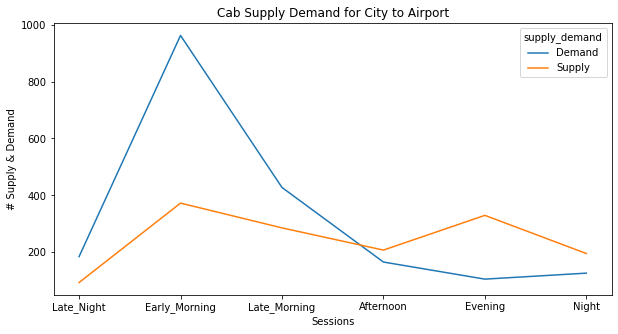

In [70]:
# plotting Supply and Demand on the City to Airport Route

df_citytoairport_supplydemand=uber_df[uber_df["Pickup point"]=='City']

df_citytoairport_supplydemand.groupby(['Session','supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(10,5))

plt.title('Cab Supply Demand for City to Airport')
plt.xlabel('Sessions')
plt.ylabel('# Supply & Demand')

plt.show()

### Answer 2.1 

#### Demand is high in the morning from City to Airport and supply is low

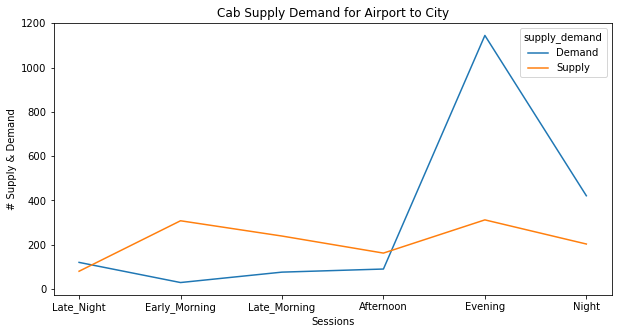

In [71]:
# plotting Supply and Demand on the Airport to City Route

df_citytoairport_supplydemand=uber_df[uber_df["Pickup point"]=='Airport']

df_citytoairport_supplydemand.groupby(['Session','supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(10,5))

plt.title('Cab Supply Demand for Airport to City')
plt.xlabel('Sessions')
plt.ylabel('# Supply & Demand')

plt.show()

### Answer 2.2

#### Demand is high in the evening from Airport to City, whereas Supply is low. 

## Question 3 - What do you think is the reason for this issue for the supply-demand gap?

Write the answer in less than 100 words. You may accompany the write-up with plot(s).

#### Answer

From the above 2 plots, 

#1 : From Airport to City, Demand is higher at 1200 requests whereas supply is about 200 only in the evenings.

#2 : From City to Airport, Demand is higher at 1000 requests whereas supply is about 200 in the mornings. 

There is a surge of requests by ~500% from airport to city in the evenings and city to airport in the mornings. 

From the below plot (inlcluding both supply/demand from city/airpot), 

#1 : Max of Supply is 600 and max of Demand in the morning is 1000. Similarly max of demand is 1200 whereas supply is 600 only. 

#2 : Supply is less than demand overall. 

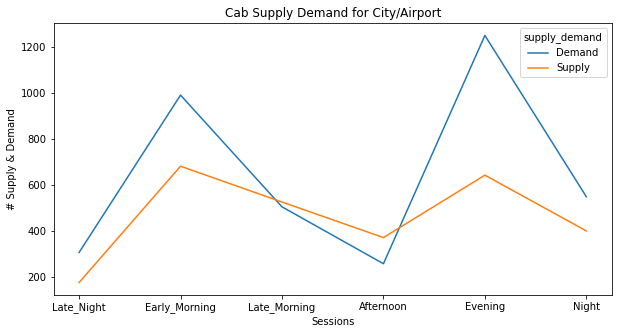

In [52]:
# plot overall supply demand including both city and airport

uber_df.groupby(['Session','supply_demand']).supply_demand.count().unstack().plot.line(legend=True, figsize=(10,5))

plt.title('Cab Supply Demand for City/Airport')
plt.xlabel('Sessions')
plt.ylabel('# Supply & Demand')

plt.show()

 ## Question 4 - Recommend some ways to resolve the supply-demand gap.

#### Answer 

#### Recommendations to meet Supply-Demand

1. Increase price in the Evenings From Airport to City and give bonus to drivers

2. Increase price in the Mornings From City to Airport and give bonus to drivers

3. Uber can give gas price during off hours to Airport and City for pickup without a ride